In [1]:
import scipy.io
import os
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

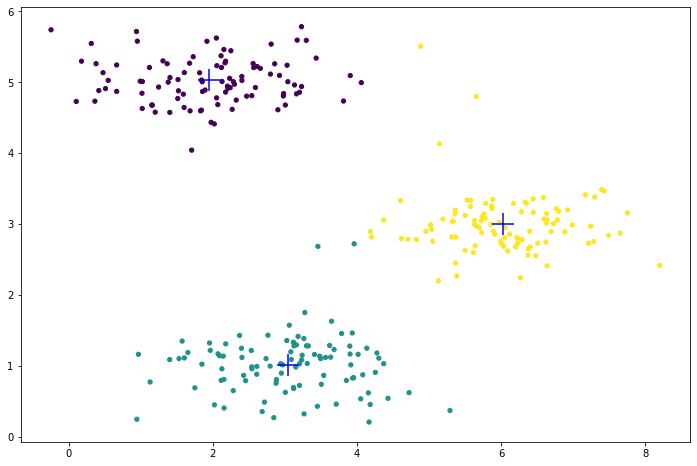

In [7]:

def findClosestCentroids(X , centroids ):
    closest = np.ones((len(X), 1), dtype= np.uint8)
    for i in range(len(X)):
        distances = (centroids - X[i])**2
        distances = np.sum(distances, axis=1)
        argmin = np.argmin(distances)
        closest[i] = argmin
        
    return closest

def computeCentroids(X, idx, K):
    centroids = np.zeros( (K, X.shape[1]) )
    for k in range(K):
        Ck = [i for i in range(idx.size) if idx[i] == k]
        centroids[k,:] = np.mean( X[Ck,:], axis = 0 )

    return centroids

data = scipy.io.loadmat(os.path.join('ex7data2.mat'))
X = data['X']
initial_centroids = np.array([[3 ,  3] , [6 , 2] , [8 , 5]])
centroids = initial_centroids

K = 3
max_iters = 10

for i in range(max_iters):
    idx = findClosestCentroids(X , centroids )
    centroids = computeCentroids(X , idx , K)
    
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=idx, marker='8', s=20)
plt.scatter(centroids[:,0], centroids[:,1], marker='+', s = 500, c='blue')
plt.show()